In [1]:
# 下面该你动手啦！
import chardet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_csv = "work/hw1_data/train.csv"
test_csv = "work/hw1_data/test.csv"

In [3]:
chardet.detect(open(train_csv, 'rb').read())

{'encoding': 'Big5', 'confidence': 0.99, 'language': 'Chinese'}

In [4]:
df_train = pd.read_csv(train_csv, encoding='Big5')
df_train.head()

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5


In [5]:
df_test = pd.read_csv(test_csv, header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,id_0,AMB_TEMP,21,21,20,20,19,19,19,18,17
1,id_0,CH4,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.8
2,id_0,CO,0.39,0.36,0.36,0.4,0.53,0.55,0.34,0.31,0.23
3,id_0,NMHC,0.16,0.24,0.22,0.27,0.27,0.26,0.27,0.29,0.1
4,id_0,NO,1.3,1.3,1.3,1.3,1.4,1.6,1.2,1.1,0.9


$$loss = \sum(y-(w*X + b))^2$$
$$∆w = \sum2*(y-(w*X+b))*(-X)$$
$$∆b = \sum2*(y-(w*X+b))*(-1)$$

In [38]:
class LinearRegression(object):
    def __init__(self, learn_rate=0.001, n_iter=20):
        self.learn_rate = learn_rate
        self.n_iter = n_iter
        self.w_b = None
        
    def fit(self, X: np.array, y):
        """训练模型"""
        self.w_b = np.zeros(X.shape[1] + 1)  # +1是b
        self.cost_ = []
        for epoch in range(self.n_iter):
            pred_y = self.forward(X)
            cost = self.loss(X, y, pred_y)
            self.cost_.append(cost)
    
    def loss(self, X, y, pred_y):
        error = y - pred_y
        self.w_b[:-1] += error.dot(X) * self.learn_rate
        self.w_b[-1] += error.sum() * self.learn_rate
        # print(np.sum(y - pred_y, axis=0))
        # return (error**2).sum() / 2.0
        return np.mean(error**2, axis=0)
    
    def forward(self, X):
        return np.dot(X, self.w_b[:-1]) + self.w_b[-1]

    def predict(self, X):
        return self.forward(X)

In [39]:
lr = LinearRegression(learn_rate=0.001, n_iter=20)
lr.fit(np.random.randn(200, 5), np.random.randn(200))

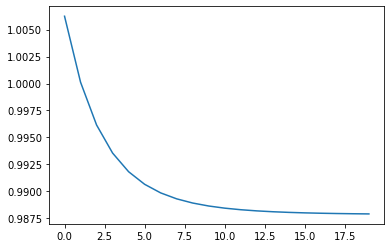

In [40]:
plt.plot(lr.cost_);

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
errors = lr.fit(np.random.randn(200, 5), np.random.randn(200))

In [20]:
lr.loss

AttributeError: 'LinearRegression' object has no attribute 'loss'

In [ ]:
df_test.astype(float, errors=)